##  **GradienBoosting** & GridSearch

## Import & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


---
## Train Test Split

In [4]:
X = pd.get_dummies(df.drop("class", axis=1), drop_first= True)
y = df["class"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size= 0.1, random_state=9)

---
## GridSearch

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
#help(GradientBoostingClassifier)

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
parameters = {
    "n_estimators" : [1,3,5,10,25,50,100],
    "max_depth" : [2,3,4,5,6]
}

In [10]:
grad_boost = GradientBoostingClassifier()

In [12]:
grid = GridSearchCV(grad_boost, parameters)

In [13]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [1, 3, 5, 10, 25, 50, 100]})

In [14]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [16]:
mantar_pred = grid.predict(X_test)

---
## Performans Metrikleri

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

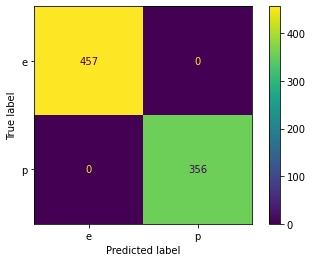

In [17]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [18]:
print(classification_report(y_test, mantar_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       457
           p       1.00      1.00      1.00       356

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [19]:
feat = grid.best_estimator_.feature_importances_
feat_df = pd.DataFrame(index=X.columns,
 columns=["Katsayı"], data= feat)

In [21]:
feat_df

,Katsayı
cap-shape_c,1.199477e-04
cap-shape_f,1.667462e-16
cap-shape_k,3.269698e-19
cap-shape_s,0.000000e+00
cap-shape_x,2.971465e-18
...,...
habitat_l,0.000000e+00
habitat_m,4.944197e-16
habitat_p,0.000000e+00
habitat_u,5.869194e-05


In [22]:
feat_df = feat_df[feat_df["Katsayı"] > 0]

In [24]:
feat_df.sort_values("Katsayı", ascending=True).transpose()

,cap-shape_k,cap-color_n,cap-shape_x,cap-color_e,gill-color_p,cap-color_w,habitat_g,cap-shape_f,cap-color_p,habitat_m,...,gill-size_n,gill-spacing_w,odor_f,odor_l,stalk-surface-below-ring_y,spore-print-color_r,stalk-root_r,bruises_t,stalk-root_c,odor_n
Katsayı,3.269698e-19,7.535427e-19,2.971465e-18,5.861774e-18,1.366683e-17,5.071752e-17,1.474531e-16,1.667462e-16,3.354140e-16,4.944197e-16,...,0.00967,0.01069,0.014565,0.022198,0.030958,0.031951,0.038572,0.055217,0.13014,0.612097


In [25]:
feat_df = feat_df[feat_df["Katsayı"] > 0.001]

In [26]:
feat_df.sort_values("Katsayı", ascending=True).transpose()

,stalk-color-below-ring_w,cap-surface_g,population_c,cap-color_y,stalk-color-below-ring_c,ring-type_p,stalk-color-below-ring_y,stalk-root_e,spore-print-color_u,stalk-surface-above-ring_s,...,gill-size_n,gill-spacing_w,odor_f,odor_l,stalk-surface-below-ring_y,spore-print-color_r,stalk-root_r,bruises_t,stalk-root_c,odor_n
Katsayı,0.001136,0.001572,0.001632,0.002116,0.002351,0.002452,0.002916,0.003171,0.003898,0.004297,...,0.00967,0.01069,0.014565,0.022198,0.030958,0.031951,0.038572,0.055217,0.13014,0.612097


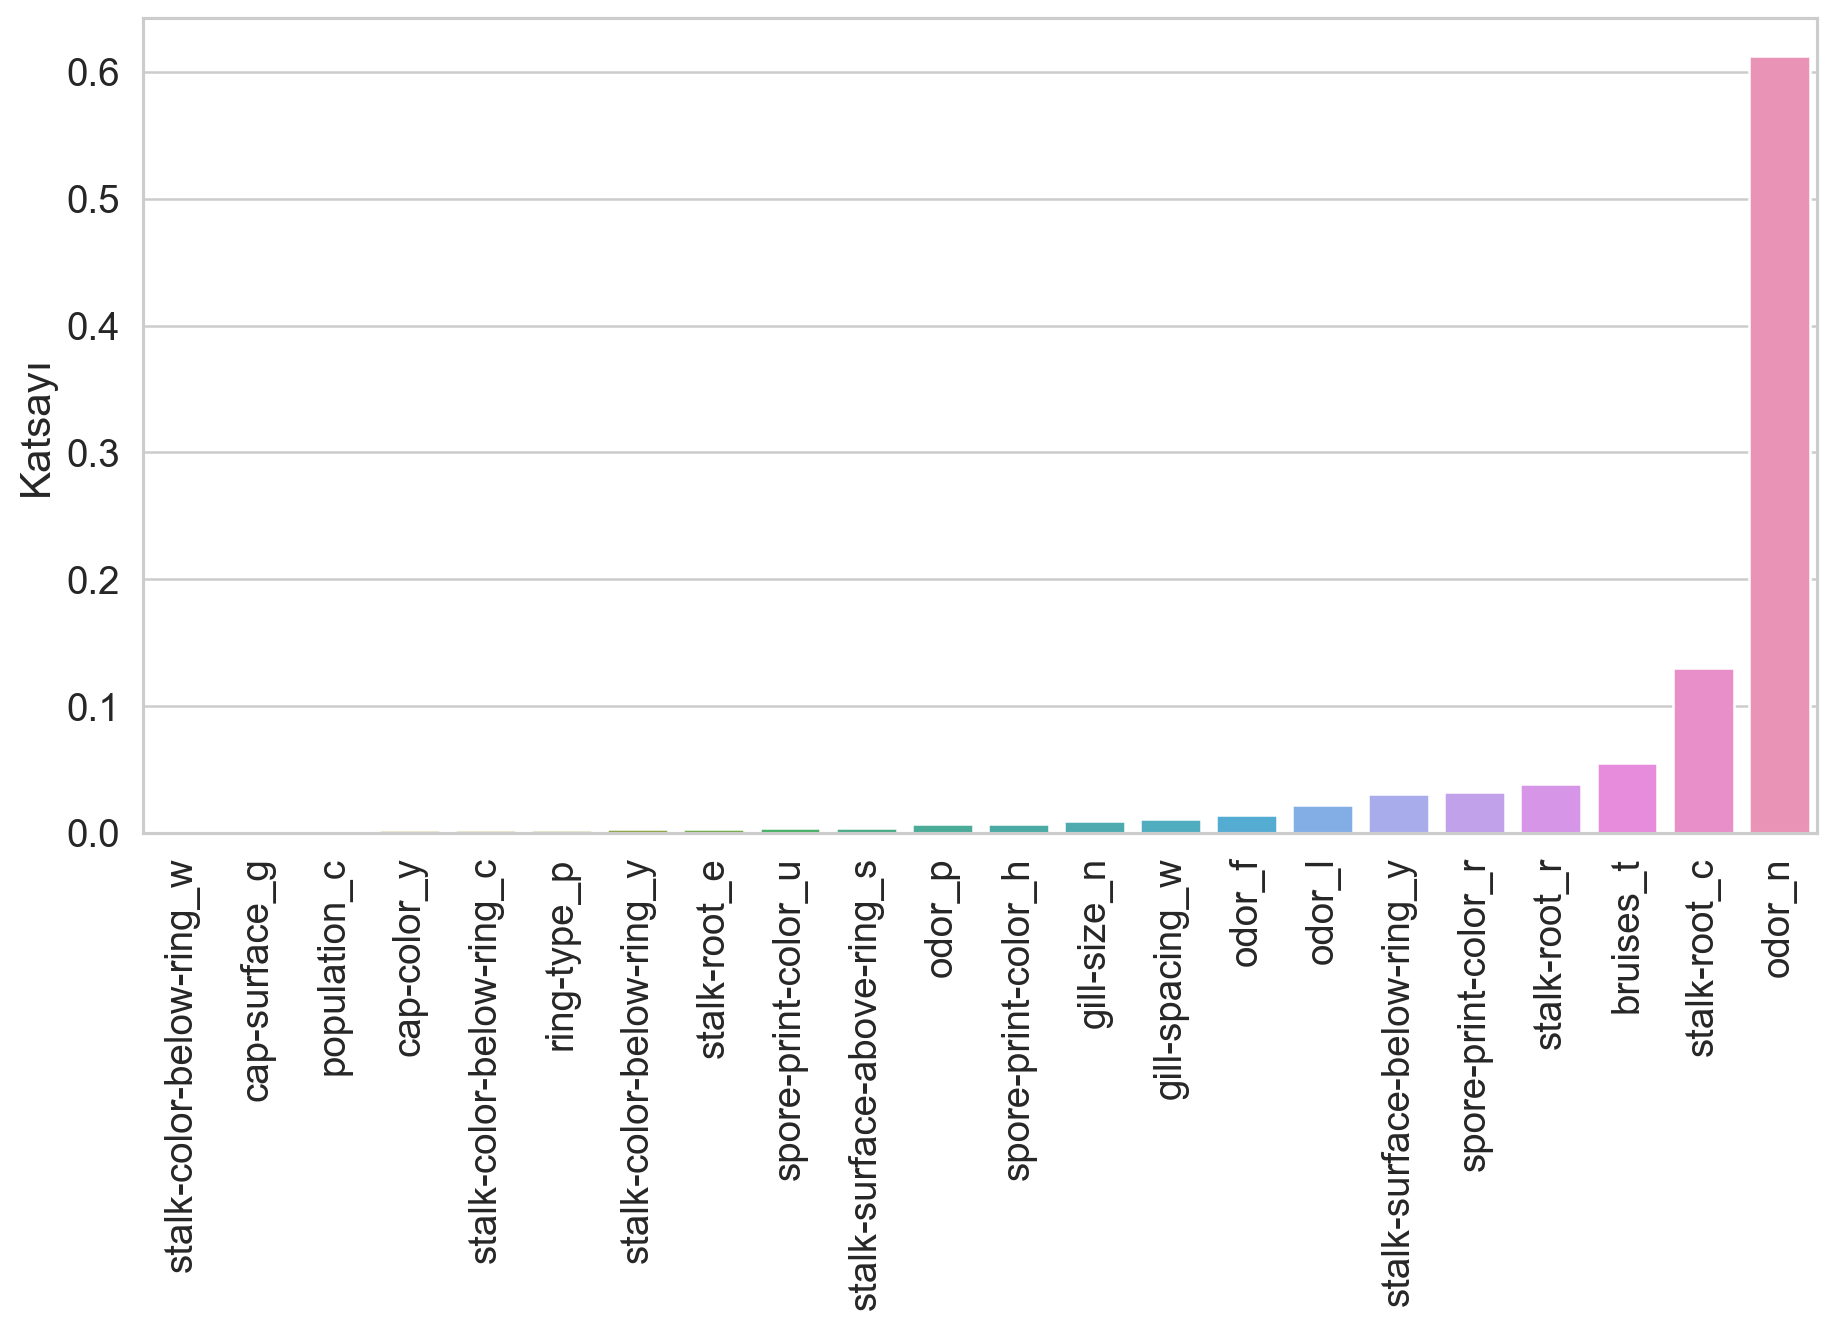

In [38]:
plt.figure(figsize=(12,6), dpi=180)
sns.set(font_scale = 1.4)
sns.set_style("whitegrid")
sns.barplot(x= feat_df.sort_values("Katsayı").index,
 y= "Katsayı", data=feat_df.sort_values("Katsayı"))
plt.xticks(rotation= 90) ;

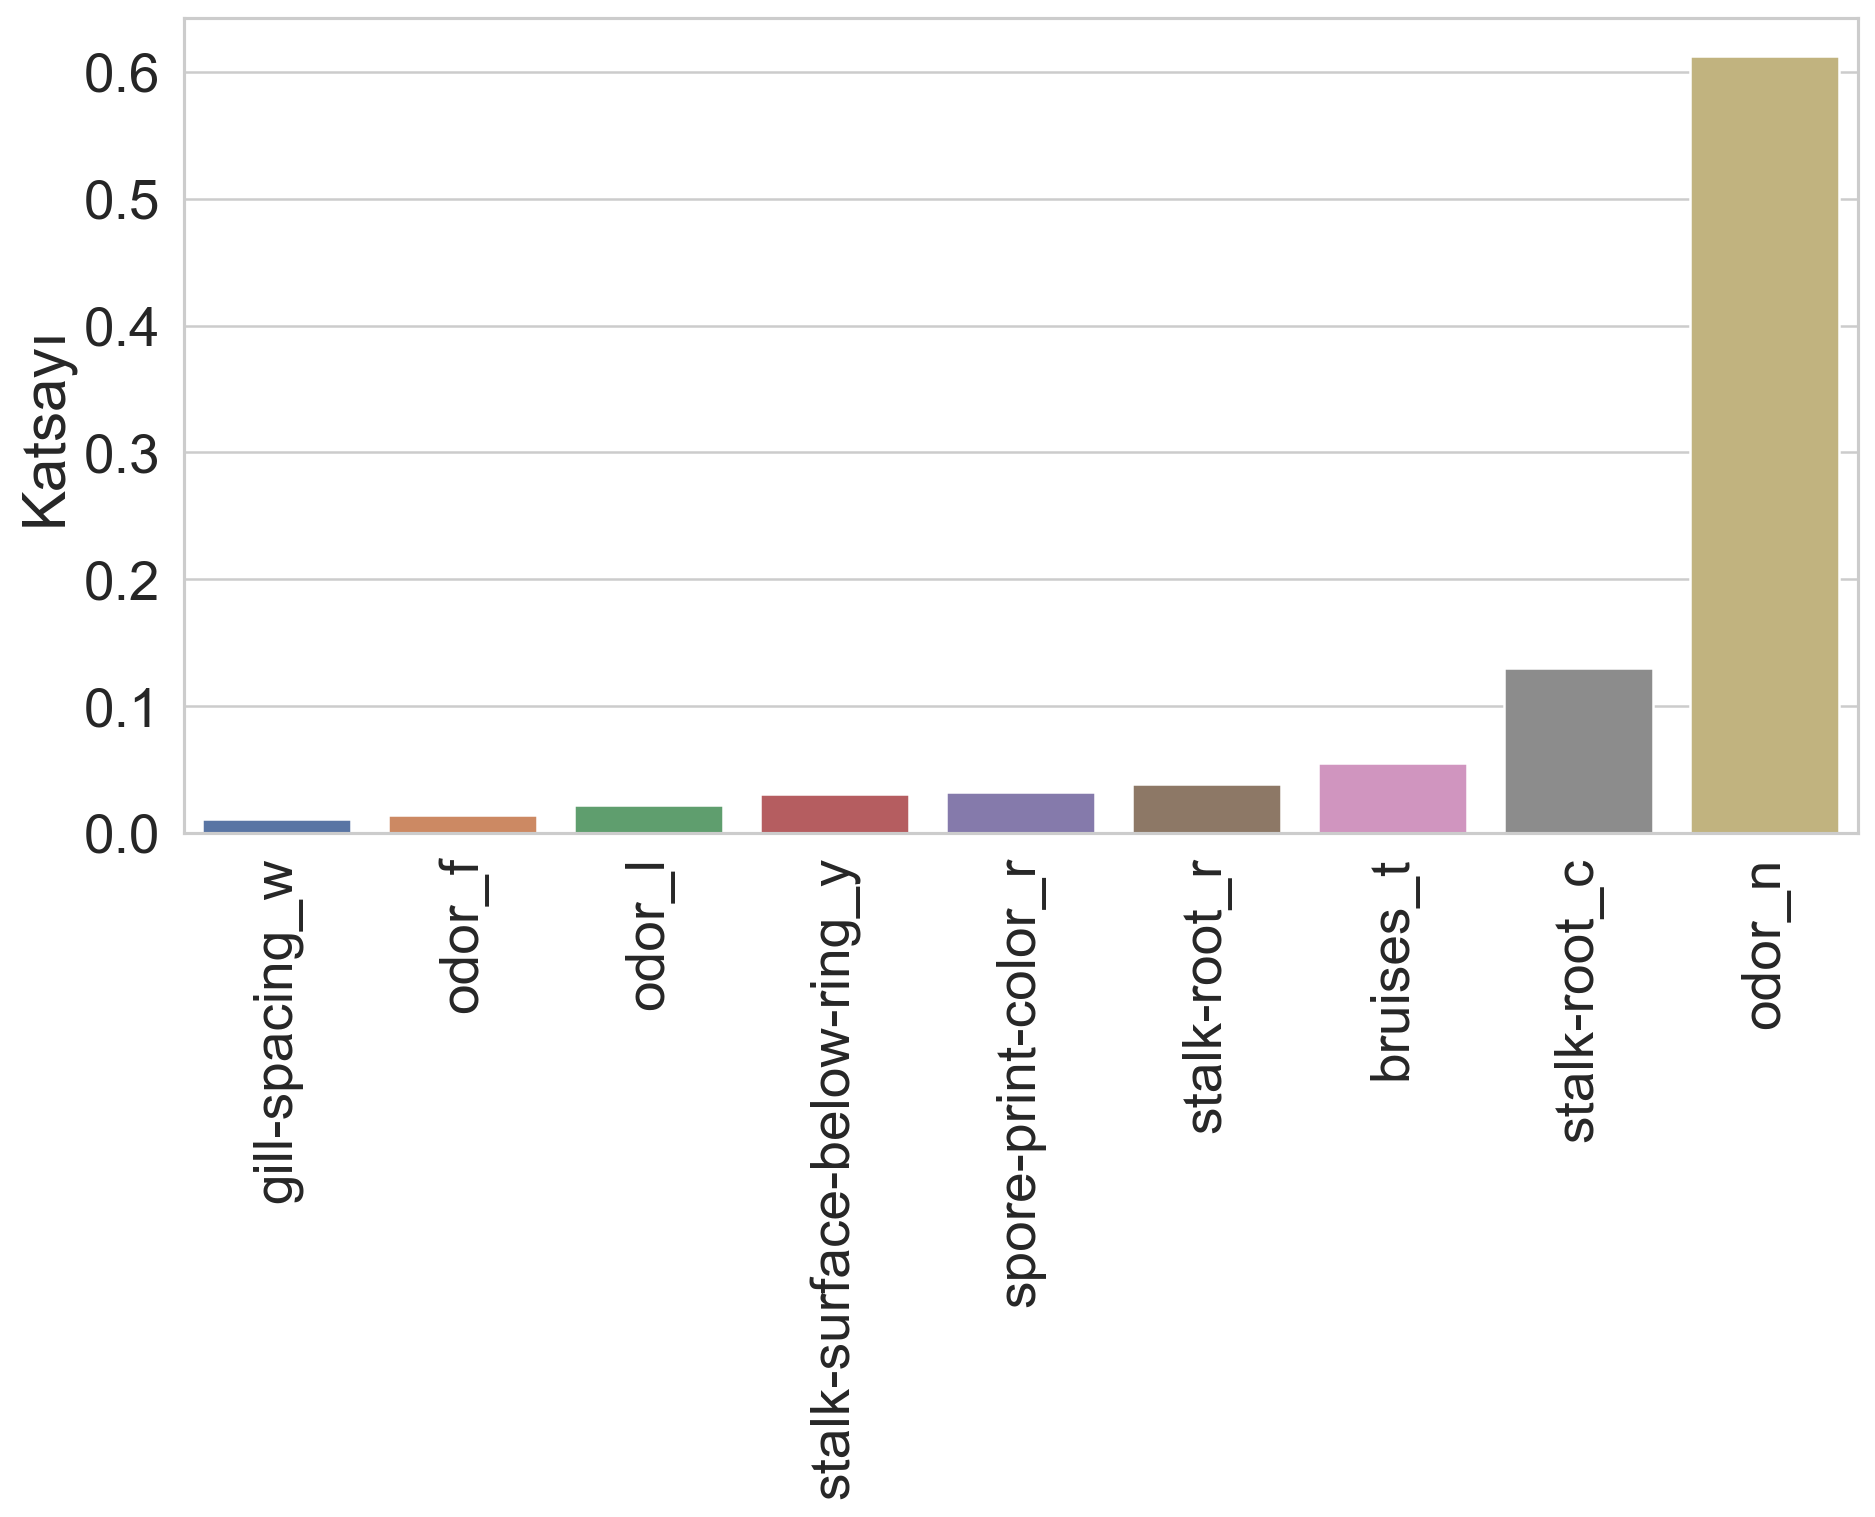

In [41]:
plt.figure(figsize=(12,6), dpi=180)
sns.set(font_scale = 2)
sns.set_style("whitegrid")
sns.barplot(x= feat_df[feat_df["Katsayı"] > 0.01].sort_values("Katsayı").index,
 y= "Katsayı", data=feat_df[feat_df["Katsayı"] > 0.01].sort_values("Katsayı"))
plt.xticks(rotation= 90) ;

---
---
# **https://www.youtube.com/watch?v=ib3u5paFMjs**